# Authorship Attribution

## Introduction

We have a set of 21 texts in an unknown language. All we've been able to determine is that 2 of them: `D1` and `D5`, were likely written by the same author. We don't know the author's identity, nor do we know what the texts say. Our task is to use analytical methods to determine the likely groupings of texts.

## Some famous historical cases of authorship attribution

- The Federalist papers, originally written pseudonymously, were determined to have been written by Alexander Hamilton (51), James Madison (29), and John Jay (5).

- In the early '90s, Heriberto Seda killed 3 people in New York City, and sent taunting letters to the police - causing suspicion that the Zodiac Killer had moved to NYC (originally, he was in San Francisco - he was never caught).  Handwriting analysis determined otherwise.

- The Voynich Manuscript: Unknown language, unknown script, unknown content.  Maybe 15th century.

- Is Shakespeare really Shakespeare?  For the most part - probably.

- Richard Bachman is... Stephen King!

## Rules

- All algorithms / toolkits / etc. are fair game ... except:
    - Do not try to decipher the texts.  The texts are written in a known language but were enciphered using a substitution cipher, so character statistics are still visible.  Deciphering it could give one group an advantage over another, and is outside the spirit of the hackathon. Any attempts to decipher the language will disqualify your team.  All identifying characteristics of the authors have been removed from the texts.

- Guesses are also outside the spirit of the competition - any suggestions must have support.  Include information for why you made your decision in the submitted deliverable.

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Define data directory
data_dir = os.path.join("data", "authorship-attribution", "Enciphered")

# Function to load text files
def load_texts(data_dir):
    texts = {}
    for file in sorted(os.listdir(data_dir)):
        if file.startswith("D") and file.endswith(".txt"):
            file_path = os.path.join(data_dir, file)
            with open(file_path, "r", encoding="utf-8") as f:
                texts[file] = f.read()
    return texts

# Load text data
data = load_texts(data_dir)

# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(data.values())

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Clustering using KMeans
n_clusters = 5  # Assuming 5 different authors
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

In [4]:
# Output clustering results
df = pd.DataFrame({"File": list(data.keys()), "Cluster": labels})
df.sort_values(by="Cluster", inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)

       File  Cluster
0   D16.txt        0
1   D10.txt        1
2   D14.txt        1
3   D12.txt        1
4   D15.txt        1
5    D2.txt        1
6   D19.txt        1
7   D17.txt        1
8    D9.txt        1
9   D11.txt        2
10  D13.txt        2
11  D20.txt        3
12   D3.txt        3
13   D8.txt        3
14   D6.txt        3
15  D18.txt        3
16   D4.txt        4
17  D21.txt        4
18   D1.txt        4
19   D5.txt        4
20   D7.txt        4


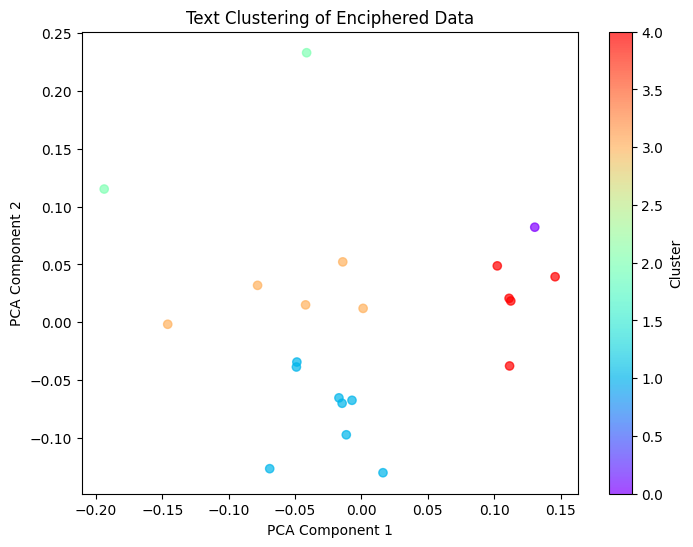

In [3]:
# Visualization of clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title("Text Clustering of Enciphered Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()